# <div align="center" style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><h1 style= "padding:20px;color:black;overflow:hidden;font-size:200%;letter-spacing:0.5px;margin:0"><b>NIDDK Diabetes Model</b> </h1> <p style= "padding:20px;color:black;overflow:hidden;font-size:50%;letter-spacing:0.5px;margin:0"><u>Classification Modeling</u></p> </div>
***

# <div style="color:black;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>A ) </b> Overview </p></div>

In the United States, the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) conducts research to advance understanding of and treatments for the most chronic, costly, and devastating diseases.<br><br>
The dataset that was used in this project came from the National Institute of Developmental Disabilities and Intellectual Disabilities. With the dataset, the goal is to predict whether or not a patient has diabetes based on certain diagnostic measurements that have been included in the dataset. Also this project's intent is to formulate a model that can accurately predict whether or not a patient in the dataset has diabetes.



# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>B ) </b> The Data </p>
<table>
    <tr><th>Data</th><th>Description</th><th>Data Type</th></tr>
    <tr><td>Pregnancies</td><td>Number of times pregnant</td><td>Int64</td></tr>
    <tr><td>Glucose</td><td>Plasma glucose concentration in an oral glucose tolerance test</td><td>Int64</td></tr>
    <tr><td>BloodPressure</td><td>Diastolic blood pressure (mm Hg)</td><td>Int64</td></tr>
    <tr><td>SkinThickness</td><td>Triceps skinfold thickness (mm)</td><td>Int64</td></tr>
    <tr><td>Insulin</td><td>Two hour serum insulin</td><td>Int64</td></tr>
    <tr><td>BMI</td><td>Body Mass Index</td><td>Float64</td></tr>
    <tr><td>DiabetesPedigreeFunction</td><td>Diabetes pedigree function</td><td>Float64</td></tr>
    <tr><td>Age</td><td>Age in years</td><td>Int64</td></tr>
    <tr><td>Outcome</td><td>Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0</td><td>Int64</td></tr>
</table><br>
The datasets are made up of a number of medical predictor variables as well as one target variable (Outcome). The number of pregnancies the patient has had, their BMI, insulin level, age, and other factors are all considered predictor variables.</div>

*** 

In [1]:
#Classic Libraries
import pandas as pd 
import numpy as np  
import random
import math
import time
import sys
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Data Viz 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# load make_blobs to simulate data
from sklearn.datasets import make_blobs, make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from IPython.display import display
import plotly.io as pio



# pre-processing

from sklearn.feature_selection import SelectKBest,  RFE, RFECV
from sklearn.preprocessing import StandardScaler, RobustScaler

# import libraries for model validation
from sklearn.model_selection import cross_val_score, train_test_split, KFold 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix as cfmx
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, adjusted_rand_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import statistics
from dudes import *
import plotly
plotly.offline.init_notebook_mode(connected=True)
pio.renderers.default = 'iframe' 
print('Imported Successfully')

Imported Successfully


In [2]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


---
# <div style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:120%;letter-spacing:0.5px;margin:0"><b>Part I: </b> Cleaning/EDA  </p></div>

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>A ) </b> House Keeping and Data Overview </p></div>
To begin we will undertake the typical house cleaning steps needed to standardize our data and ensure that it has integrity when we get to the modeling phase.

First I would like to simplify our headers for a simpler process when referencing them through the project.

In [3]:
df.rename(columns={'BloodPressure':'bp', 'SkinThickness':'st', 'DiabetesPedigreeFunction':'dpf'}, inplace=True)
df.rename(str.lower, axis=1, inplace=True)

> This is just a simple little research function to understand the basics of the data and to be able to see what steps we should take to ensure that it is nice and tidy for our analysis

In [4]:
data_research(df, data_name='Diabetes')


<span style='text-decoration:underline;text-align:center;font-size:28px;color:#42358a'>**Diabetes**</span>

<span style='text-decoration:None;text-align:center;font-size:20px;color:#7d8a35'>______________________________________________________</span>

<span style='text-decoration:None;text-align:center;font-size:22px;color:#42358a'>**Basic Info**</span>

<span style='text-decoration:None;text-align:center;font-size:14px;color:#000000'>**Shape** = (768, 9)</span>

<span style='text-decoration:None;text-align:center;font-size:14px;color:#000000'>**Columns** = pregnancies, glucose, bp, st, insulin, bmi, dpf, age, outcome</span>

<span style='text-decoration:None;text-align:center;font-size:14px;color:#000000'>**Memory Usage** = 54.12, kilobytes</span>

,Column,Non-Null Count,Dtype
0,pregnancies,768,int64
1,glucose,768,int64
2,bp,768,int64
3,st,768,int64
4,insulin,768,int64
5,bmi,768,float64
6,dpf,768,float64
7,age,768,int64
8,outcome,768,int64


<span style='text-decoration:None;text-align:center;font-size:20px;color:#7d8a35'>______________________________________________________</span>

<span style='text-decoration:None;text-align:center;font-size:22px;color:#42358a'>**Head**</span>

,pregnancies,glucose,bp,st,insulin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


<span style='text-decoration:None;text-align:center;font-size:20px;color:#7d8a35'>______________________________________________________</span>

<span style='text-decoration:None;text-align:center;font-size:22px;color:#42358a'>**Describe**</span>

,pregnancies,glucose,bp,st,insulin,bmi,dpf,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<span style='text-decoration:None;text-align:center;font-size:20px;color:#7d8a35'>______________________________________________________</span>

<span style='text-decoration:None;text-align:center;font-size:22px;color:#42358a'>**Duplicates**</span>

<span style='text-decoration:None;text-align:center;font-size:14px;color:#000000'>**There are 0 duplicates.**</span>

<span style='text-decoration:None;text-align:center;font-size:20px;color:#7d8a35'>______________________________________________________</span>

<span style='text-decoration:None;text-align:center;font-size:22px;color:#42358a'>**Missing**</span>

,Percent_Missing


<span style='text-decoration:None;text-align:center;font-size:20px;color:#7d8a35'>______________________________________________________</span>

<span style='text-decoration:None;text-align:center;font-size:22px;color:#42358a'>**Unique**</span>

<span style='text-decoration:None;text-align:center;font-size:14px;color:#000000'>**Observation:** The Datset has 8 numerical & 1 categorical features.</span>

<span style='text-decoration:None;text-align:center;font-size:20px;color:#7d8a35'>______________________________________________________</span>

<span style='text-decoration:None;text-align:center;font-size:22px;color:#42358a'>**Quantiles**</span>

,0.0,0.05,0.5,0.95,0.99,1.0
pregnancies,0.000000,0.000000,3.000000,10.000000,13.000000,17.000000
glucose,0.000000,79.000000,117.000000,181.000000,196.000000,199.000000
bp,0.000000,38.700000,72.000000,90.000000,106.000000,122.000000
st,0.000000,0.000000,23.000000,44.000000,51.330000,99.000000
insulin,0.000000,0.000000,30.500000,293.000000,519.900000,846.000000
bmi,0.000000,21.800000,32.000000,44.395000,50.759000,67.100000
dpf,0.078000,0.140350,0.372500,1.132850,1.698330,2.420000
age,21.000000,21.000000,29.000000,58.000000,67.000000,81.000000
outcome,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


<span style='text-decoration:None;text-align:center;font-size:20px;color:#7d8a35'>______________________________________________________</span>

### The data looks to be in good order and cleaned before my acquistion since there is no nulls, proper data types and a target varialbe that has been encoded.

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>B ) </b> Feature Relationships </p></div>

In [5]:
titledict=dict(family="Arial",
               size=24,
               color='#000000')
fontdict=dict(family="Arial",
               size=18,
               color='#000000')

In [6]:
ind = df['outcome'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Pregnancies',
                                 values=df['pregnancies']),
                            dict(label='Glucose',
                                 values=df['glucose']),
                            dict(label='Blood Pressure',
                                 values=df['bp']),
                            dict(label='ST',
                                 values=df['st']),
                            dict(label='Insulin',
                                 values=df['insulin']),
                            dict(label='BMI',
                                 values=df['bmi']),
                            dict(label='DPF',
                                 values=df['dpf'])],
                showupperhalf=False, 
                text=df['outcome'],
                marker=dict(color=ind,
                            showscale=False, 
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(#font=fontdict,
                  height =800,
                  title=dict(
                      text= "Feature Relationships",
                      font=titledict))
fig.show()



# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>C ) </b> Distributions of Features</p></div>

In [7]:
titles = list(df.columns)
for i in range(len(titles)):
    titles[i] = titles[i].capitalize()

plot_rows=3
plot_cols=3
fig = make_subplots(rows=plot_rows, cols=plot_cols)# subplot_titles=titles)

# add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        #print(str(i)+ ', ' + str(j))
        fig.add_trace(go.Box(y=df[df.columns[x]].values,
                                 name = df.columns[x].title(),
                            ),
                     row=i,
                     col=j)

        x=x+1

# Format and show fig
fig.update_layout(height=1000, title='Distribution Of Each Feature', title_font=titledict, font=fontdict)
fig.show()

> Excluding DiabetesPedigree Function and insulin the data seems to be without many outliers. I little later I will look to see how much of an impact those outliers affect the model and than assess if they need to be excluded.

In [8]:
def hist_plots(data, rows, cols, title):
    plot_rows=rows
    plot_cols=cols
    fig = make_subplots(rows=plot_rows, cols=plot_cols, subplot_titles=titles)

    # add traces
    x = 0
    for i in range(1, plot_rows + 1):
        for j in range(1, plot_cols + 1):
            #print(str(i)+ ', ' + str(j))
            fig.add_trace(go.Histogram(x=data[data.columns[x]].values,
                                    name = data.columns[x].title()
                                ),
                        row=i,
                        col=j)

            x=x+1

    # Format and show fig
    fig.update_layout(font = fontdict, title_font=titledict, title = title)
    fig.show()

hist_plots(data = df, rows=4, cols=2, title="Distribution of Data - Original")



> It seems like we seem to have alot of values of 0 so my early presumption of no NaNs might be inncorrect and we they are just labeled as 0. For certain columns like pregancies a value of 0 would be fine however with Blood Pressure, Skin Thickness, BMI, Glucose and insulin a 0 would be a result of missing data. 

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>D ) </b> Missing Values</p></div>

In [9]:
cols_zeros = ['bmi','glucose','bp','st',"insulin"]
total_values = len(df)

for col in cols_zeros:
    counts = df[df[col]==0][col].count()
    print(str(col).title()+' has '+str(counts)+' number of cases that are 0 in value,\nPercent:',100*counts/total_values,' %')
    print(df[df[col] ==0].groupby('outcome')['age'].count())
    print()



Bmi has 11 number of cases that are 0 in value,
Percent: 1.4322916666666667  %
outcome
0    9
1    2
Name: age, dtype: int64

Glucose has 5 number of cases that are 0 in value,
Percent: 0.6510416666666666  %
outcome
0    3
1    2
Name: age, dtype: int64

Bp has 35 number of cases that are 0 in value,
Percent: 4.557291666666667  %
outcome
0    19
1    16
Name: age, dtype: int64

St has 227 number of cases that are 0 in value,
Percent: 29.557291666666668  %
outcome
0    139
1     88
Name: age, dtype: int64

Insulin has 374 number of cases that are 0 in value,
Percent: 48.697916666666664  %
outcome
0    236
1    138
Name: age, dtype: int64



> I think it will be best to fill values with mean to ensure outliers or missing data at zero do not unvalidate the later model

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>E ) </b> Handle Outliers </p></div>

In [10]:
mean0 = df[cols_zeros].mean()
df[cols_zeros]=df[cols_zeros].replace(0, mean0)

> Now that we have address the 'missing values', let us start with our exploratory analysis.

---
# <div style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:120%;letter-spacing:0.5px;margin:0"><b>Part II: </b> Visualization EDA  </p></div>

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>A ) </b> Distribution of Target Variable </p></div>

> First we should look at an overview of the outcome distribution than we will dive into each variable and see if there is significant differences in how patients with Diabetes and those without Diabetes are distributed.

In [11]:
colors = ['SteelBlue', 'SandyBrown']
labels=['No Diabetes','Yes, Diabetes']
values= list(df.outcome.value_counts())

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(height=700, font=fontdict)

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=25,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.add_annotation(dict(font=titledict,
                        x=0.55,
                        y=1.05,
                        text="Distribution of Outcomes in Patients",
                        bordercolor="SandyBrown",
                        borderwidth=4,
                        borderpad=12,
                        bgcolor="SteelBlue"))
fig.show()

In [12]:
surv = df[df['outcome']==0]['age']
not_surv = df[df['outcome']==1]['age']
hist_data = [surv,not_surv]
group_labels = ['Not Diabetic', 'Diabetic']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(font=fontdict, title={'text':'Analysis in Age on Diabetic Status', 
                                                     'font':titledict, 'x':0.45})
fig.update_xaxes(title='Age')

fig.show()

In [13]:
surv = df[df['outcome']==0]['glucose']
not_surv = df[df['outcome']==1]['glucose']
hist_data = [surv,not_surv]
group_labels = ['Not Diabetic', 'Diabetic']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(font=fontdict, title={'text':'Analysis in Glucose on Diabetic Status', 
                                                     'font':titledict, 'x':0.45})
fig.update_xaxes(title='Glucose Concentration Level')

fig.show()

In [14]:
surv = df[df['outcome']==0]['bp']
not_surv = df[df['outcome']==1]['bp']
hist_data = [surv,not_surv]
group_labels = ['Not Diabetic', 'Diabetic']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(font=fontdict, 
                  title={'text':'Analysis in Blood Pressure on Diabetic Status', 'font':titledict, 'x':0.5})
fig.show()

In [15]:
surv = df[df['outcome']==0]['bmi']
not_surv = df[df['outcome']==1]['bmi']
hist_data = [surv,not_surv]
group_labels = ['Not Diabetic', 'Diabetic']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(font=fontdict, title={'text':'Analysis in BMI on Diabetic Status', 'font':titledict, 'x':0.5})
fig.update_xaxes(title='Blood Pressure Level (mm Hg)')
fig.show()

In [16]:
surv = df[df['outcome']==0]['pregnancies']
not_surv = df[df['outcome']==1]['pregnancies']
hist_data = [surv,not_surv]
group_labels = ['Not Diabetic', 'Diabetic']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(font=fontdict, title={'text':'Analysis in Pregnancies on Diabetic Status', 'font':titledict, 'x':0.5})
fig.show()

In [17]:
df['outcome'] =df['outcome'].astype(str)
fig = px.scatter(df, y="age", x="dpf", color="outcome", marginal_x='violin', marginal_y='box', trendline='ols', hover_data=df.columns)
fig.update_layout(font=fontdict, title={'text':"Analysis in Age and Diabetic Pedigree Fuction on Diabetic Status", 
                                                    'font':titledict, 'x':0.5})
fig.show()
df['outcome'] =df['outcome'].astype(int)

**Preliminary Analysis:**
From the distribution of most of the factors, it seems like variables like Glucose, BMI and Age play the most pivotal role in the propensity to becom diabetic.

---

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>B ) </b> Correlation</p></div>

In [18]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 15))

Top Absolute Correlations
pregnancies  age        0.544341
st           bmi        0.535703
glucose      outcome    0.492908
             insulin    0.396597
bp           age        0.326740
bmi          outcome    0.312254
bp           bmi        0.281231
glucose      age        0.266600
st           insulin    0.240361
age          outcome    0.238356
glucose      bmi        0.231478
pregnancies  outcome    0.221898
glucose      bp         0.219666
pregnancies  bp         0.208984
insulin      bmi        0.189856
dtype: float64


In [19]:
heatmaps_tri(df,temp='plotly_dark')
corr = round(df.corr(),4)
dcorr = corr.iloc[8]
dcdf = pd.DataFrame(dcorr)
print('They Most Correlated Factor to being Diabetic are :',dcdf.sort_values(by='outcome', ascending=False
                      ))

They Most Correlated Factor to being Diabetic are :              outcome
outcome       1.0000
glucose       0.4929
bmi           0.3123
age           0.2384
pregnancies   0.2219
insulin       0.1792
st            0.1750
dpf           0.1738
bp            0.1630


# <div style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:120%;letter-spacing:0.5px;margin:0"><b>Part III: </b> Modeling Time  </p></div>

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>A ) </b> Feature Engineering </p></div>

> Now it is time to make sure all are features are finely tuned to and to check and see if there are any other featues we can add by converting som of the more contious features into categorical features. We will start by adding a vfew new categorical columns for BMI, Blood Pressure, Gluclose Levels and Insulin. By seperating them into below average, average, above average and abnormal groups we will be able to have a better way to train our model and gauge if someone is or is on the track to becoming diabetic.


In [20]:
# Always smart to make a copy of your data before feature engineering
data = df.copy(deep=True)

## 1. Body Mass Index

#### Create new categories for BMI using the [CDC's](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html) methodology for BMI categories. However I did add a Morbid section for thouse who are more an order of maginutude away from normal.

In [21]:

bmis = pd.Series(["Underweight", "Normal", "Overweight", "Obesese", "MorbidlyObesese"], dtype = "category")

df["bmi_cat"] = bmis

df.loc[df["bmi"] < 18.5, "bmi_cat"] = bmis[0]
df.loc[(df["bmi"] > 18.0) & (df["bmi"] <= 24.9), "bmi_cat"] = bmis[1]
df.loc[(df["bmi"] > 24.9) & (df["bmi"] <= 29.9), "bmi_cat"] = bmis[2]
df.loc[(df["bmi"] > 29.9) & (df["bmi"] <= 39.9), "bmi_cat"] = bmis[3]
df.loc[(df["bmi"] > 40.), "bmi_cat"] = bmis[4]

df.value_counts(['bmi_cat'])

bmi_cat        
Obesese            385
Overweight         179
Normal             106
MorbidlyObesese     96
Underweight          0
dtype: int64

#### Create new categories for Blood Pressure using the [Mayo Clinic's](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982) methodology for Blood Pressure categories. 

In [22]:
def bp_cats(r):
    if r["bp"] <= 80:
        return "Normal"
    elif r["bp"]> 80 and r["bp"] <= 90:
        return "Highbp1"
    elif r["bp"]> 90 and r["bp"] <= 119:
        return "Highbp2"
    elif r["bp"] == 0:
        return "Unknown"
    else:
        return "Abnormal"

In [23]:
df['bp_cat'] = df.apply(bp_cats, axis=1)
df.value_counts(['bp_cat'])

bp_cat  
Normal      603
Highbp1     127
Highbp2      37
Abnormal      1
dtype: int64

#### Create new categories for Glucose Levels using the [Mayo Clinic's](https://www.mayoclinic.org/diseases-conditions/diabetes/in-depth/blood-sugar/art-20046628) methodology for Glucose categories. 

In [24]:
glucoses = pd.Series(['Normal', 'Impaired', 'Diabetic)'],dtype = "category")

df["glucose_cat"] = glucoses

df.loc[df["glucose"] < 130.0, "glucose_cat"] = glucoses[0]
df.loc[(df["glucose"] > 130.1) & (df["glucose"] <= 160.0), "glucose_cat"] = glucoses[1]
df.loc[(df["glucose"] > 160.0), "glucose_cat"] = glucoses[2]


In [25]:
df.value_counts(['glucose_cat'])

glucose_cat
Normal         510
Impaired       150
Diabetic)      101
dtype: int64

#### Create new categories for Insulin Levels using the [Mayo Clinic's](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982) methodology for Inslulin categories. 

In [26]:
def insulin_cats(r):
    if r["insulin"] >= 16 and r["insulin"] <= 90:
        return "Normal"
    elif r["insulin"]> 90 and r["insulin"] <= 160:
        return "Needs_Improvement"
    elif r["insulin"] == 0:
        return "Unknown"
    else:
        return "Abnormal"

In [27]:
df['insulin_cat'] = df.apply(insulin_cats, axis=1)
df.value_counts(['insulin_cat'])

insulin_cat      
Normal               499
Abnormal             139
Needs_Improvement    130
dtype: int64

#### Create Dummies to better process these new features and derive more meaning from them.

In [28]:
dfdummy = pd.get_dummies(df, columns = ['bp_cat', 'bmi_cat', 'glucose_cat', 'insulin_cat'], drop_first= True)
dfdummy.columns = dfdummy.columns.str.lower()

In [29]:
print("Orignial Data Shape:", data.shape)
print("Categorical Data Shape:",df.shape)
print("Dummy Data Shape:",dfdummy.shape)

Orignial Data Shape: (768, 9)
Categorical Data Shape: (768, 13)
Dummy Data Shape: (768, 20)


# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>B ) </b> Scale The Data</p></div>

> Since we do have a fair bit of outliers and the data is alot more categorical at this point I believe using the median to scale as oppose to the mean would be the best course of action when it comes to scaling, therefor I am going to apply a Robust Scaler

In [30]:
y = dfdummy.outcome
X = dfdummy.drop(['outcome', 'bp_cat_highbp1', 'bp_cat_highbp2', 'bp_cat_normal',
       'bmi_cat_normal', 'bmi_cat_obesese', 'bmi_cat_overweight',
       'bmi_cat_underweight', 'glucose_cat_impaired', 'glucose_cat_normal',
       'insulin_cat_needs_improvement', 'insulin_cat_normal'], axis = 1)
cols = X.columns
index = X.index

> Scale the Data and then merge it back with the categorical dummy data

In [31]:
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [32]:
X = pd.concat([X, dfdummy.iloc[:,9:]], axis = 1)


# <div style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:120%;letter-spacing:0.5px;margin:0"><b>Part IV: </b> Modeling Time  </p></div>

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>A ) </b> Train-Test Split </p></div>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [34]:
print(X_train.shape,
y_train.shape)

(614, 19) (614,)


# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>B ) </b> Create Pipline Of Models </p></div>
> To find the best model we are going to set up a pipeline to run through the train and test features and test the accuracy

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
clfs = []
clfs.append(('Logistic Regression', LogisticRegression()))
clfs.append(('KNeighbors', KNeighborsClassifier()))
clfs.append(('Support Vector', SVC()))
clfs.append(('Decision Tree', DecisionTreeClassifier()))
clfs.append(('Random Forest', RandomForestClassifier()))
clfs.append(('AdaBoost', AdaBoostClassifier()))
clfs.append(('Gradient Boosting', GradientBoostingClassifier()))
clfs.append(("GaussianNB", GaussianNB()))

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>C ) </b> Run Models </p></div>

In [37]:

def run_model(clf):
    ### Simple Function to run a model with the basics in order
    ## Will be used in the next for statemtnt to run each model
    Features = ['pregnancies', 'glucose', 'bp', 'st', 'insulin', 'bmi', 'dpf', 'age']
    X = df[Features]
    y = df.outcome
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
    
    clf_fit = clf.fit(X_train, y_train)
    clf_pred = clf_fit.predict(X_test)
    clf_acc = accuracy_score(y_test, clf_pred)
    accuracy_list.append(100*clf_acc)
        
    return( "{:.3f}%".format(100* clf_acc))

In [38]:

accuracy_list= []
clf_acc = []
acc = []
cmx=[]
for name, clf in clfs:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acscore = accuracy_score(y_test, y_pred)
    cm=cfmx(y_test, y_pred)
    
    cmx.append(cm)
    acc.append(round(acscore*100, 3))
    clf_acc.append(name)
accscore = pd.DataFrame({'Classifier': clf_acc, 'Score': acc})
cmatrix = pd.DataFrame({'Classifier':clf_acc, 'Cmx': cmx})
# boxplot algorithm comparison


accscore

,Classifier,Score
0,Logistic Regression,75.974
1,KNeighbors,75.325
2,Support Vector,74.026
3,Decision Tree,68.831
4,Random Forest,75.325
5,AdaBoost,74.026
6,Gradient Boosting,72.078
7,GaussianNB,74.675



# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>D ) </b> Cross Validation </p></div>

In [39]:
def kfold_CVs(clf):
        kfold = KFold(n_splits=10, shuffle=True, random_state=45) 
        score = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy').mean()
    
        return("{:.3f}%".format(100*score,3))

In [40]:
names = []
scores = []
for name, clf in clfs:
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=45) 
    score = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(round(score*100, 3))
    
kfcv_df = pd.DataFrame({'Classifier': names, 'Score': scores})

print('Cross Validation Score of LogisticRegression:', kfold_CVs(LogisticRegression()))
print('Cross Validation Score of AdaBoostClassifier:', kfold_CVs(AdaBoostClassifier()))
print('Cross Validation Score of GradientBoostingClassifier:', kfold_CVs(GradientBoostingClassifier()))
print('Cross Validation Score of KNeighborsClassifier:', kfold_CVs(KNeighborsClassifier()))
print('Cross Validation Score of DecisionTreeClassifier:', kfold_CVs(DecisionTreeClassifier()))
print('Cross Validation Score of RandomForestClassifier:', kfold_CVs(RandomForestClassifier()))
print('Cross Validation Score of SupportVectorClassifier:', kfold_CVs(SVC()))
print('Cross Validation Score of GaussianNaiveBayesClassifier:', kfold_CVs(GaussianNB()))
kfcv_df

Cross Validation Score of LogisticRegression: 75.786%
Cross Validation Score of AdaBoostClassifier: 73.568%
Cross Validation Score of GradientBoostingClassifier: 74.356%
Cross Validation Score of KNeighborsClassifier: 73.313%
Cross Validation Score of DecisionTreeClassifier: 67.061%
Cross Validation Score of RandomForestClassifier: 77.221%
Cross Validation Score of SupportVectorClassifier: 76.830%
Cross Validation Score of GaussianNaiveBayesClassifier: 72.915%


,Classifier,Score
0,Logistic Regression,75.786
1,KNeighbors,73.313
2,Support Vector,76.830
3,Decision Tree,69.137
4,Random Forest,76.437
5,AdaBoost,73.568
6,Gradient Boosting,74.228
7,GaussianNB,72.915


> Cross Validation definitley assisted us with getting a betting accuracy score, now we have a cursory view of which model's might be for us. Logisitic Regression, Support Vector, Random Classifier and ADA Boost All did well

In [41]:
fig = px.bar(accscore, x = 'Classifier', y = 'Score', 
             color='Score',  color_continuous_scale=px.colors.sequential.Sunset,
            hover_name="Score", hover_data=["Classifier"])
fig.update_layout(height=600, font=fontdict, title={'text':'Accuracy Scores', 'font':titledict, 'x':0.5})


fig.show()

In [42]:
fig = px.bar(kfcv_df, x = 'Classifier', y = 'Score', title='Cross Validation Scores', 
             color='Score',  color_continuous_scale=px.colors.sequential.Sunset,
            hover_name="Score", hover_data=["Classifier"])
fig.update_layout(height=600, font=fontdict, title={'text':'Cross Validation Scores', 'font':titledict, 'x':0.5})

fig.show()

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>E ) </b> Confusion Matrix </p></div>

In [43]:
cmatrix

,Classifier,Cmx
0,Logistic Regression,"[[88, 16], [21, 29]]"
1,KNeighbors,"[[87, 17], [21, 29]]"
2,Support Vector,"[[89, 15], [25, 25]]"
3,Decision Tree,"[[78, 26], [22, 28]]"
4,Random Forest,"[[86, 18], [20, 30]]"
5,AdaBoost,"[[84, 20], [20, 30]]"
6,Gradient Boosting,"[[81, 23], [20, 30]]"
7,GaussianNB,"[[81, 23], [16, 34]]"


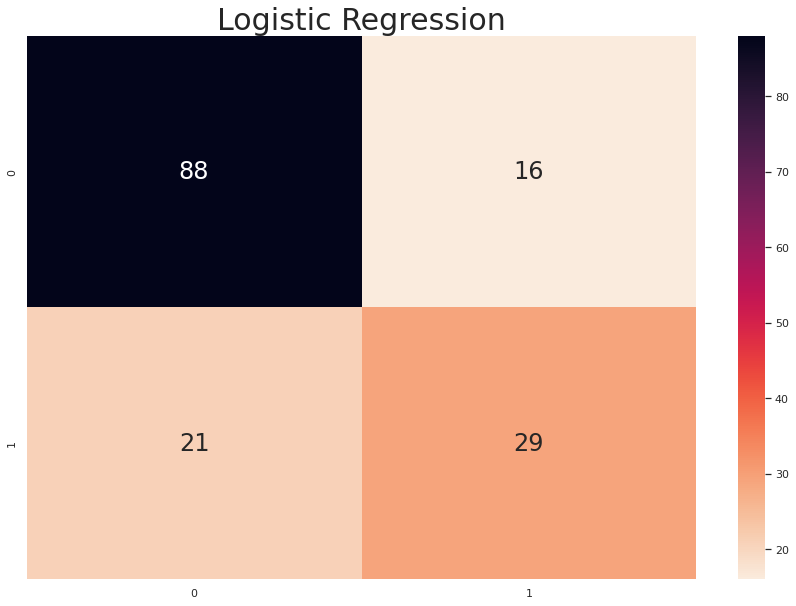

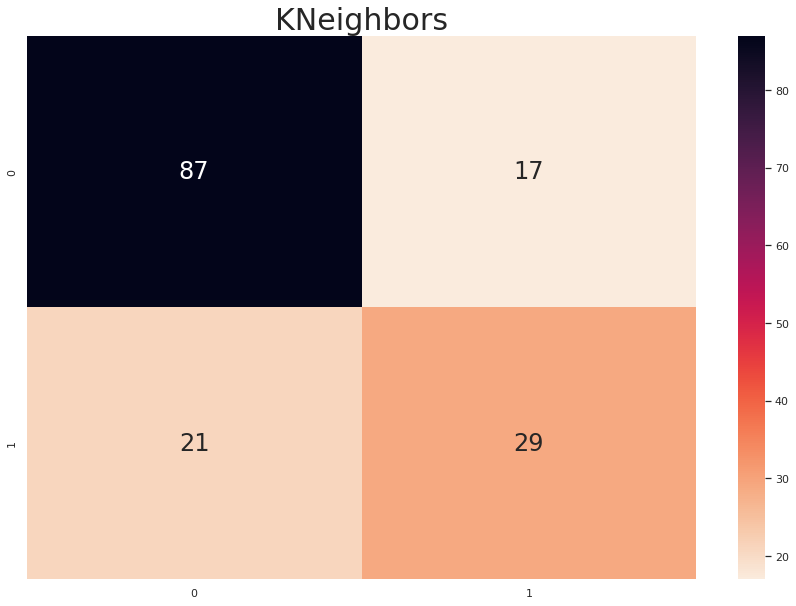

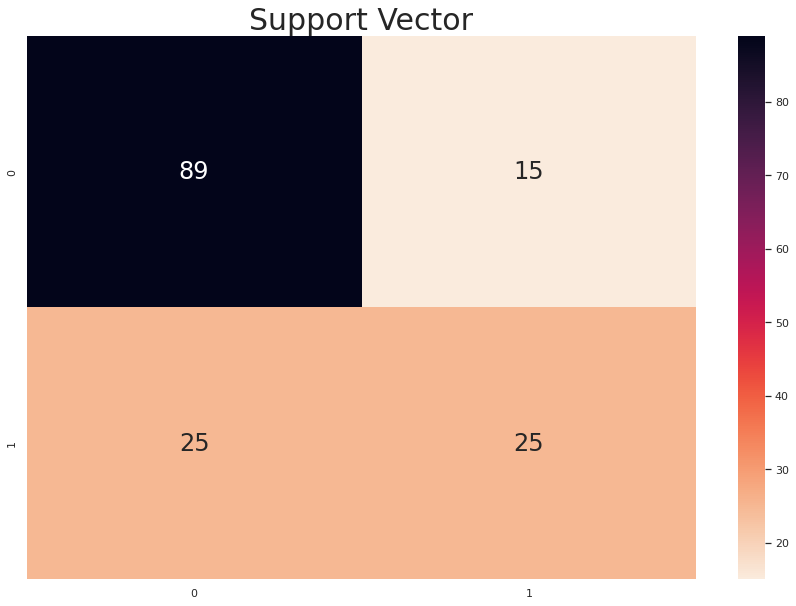

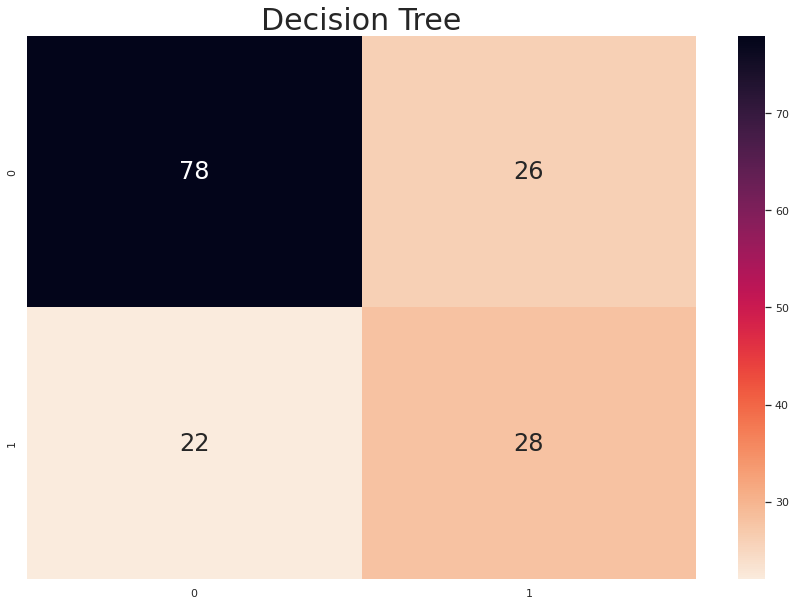

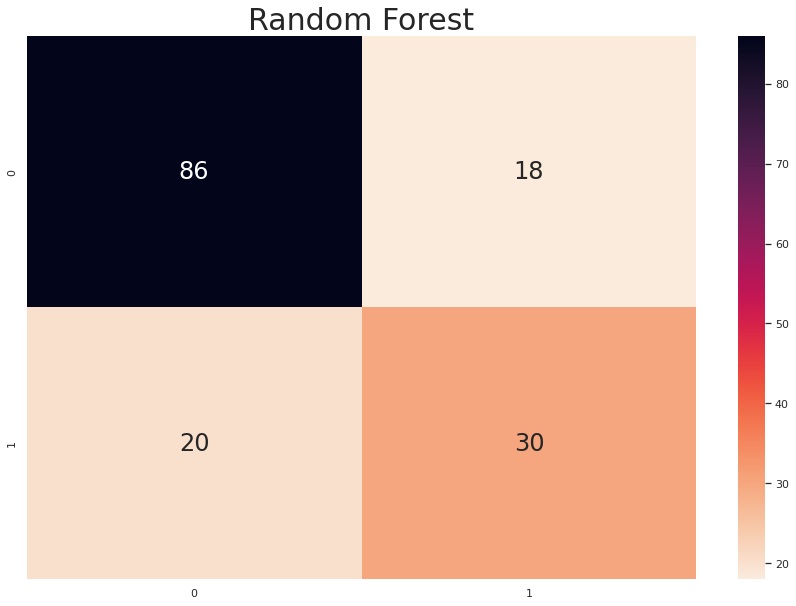

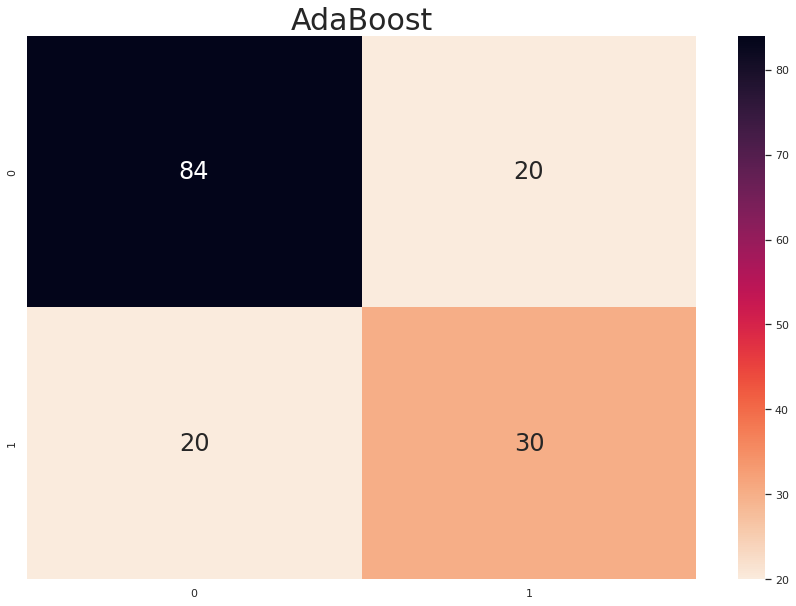

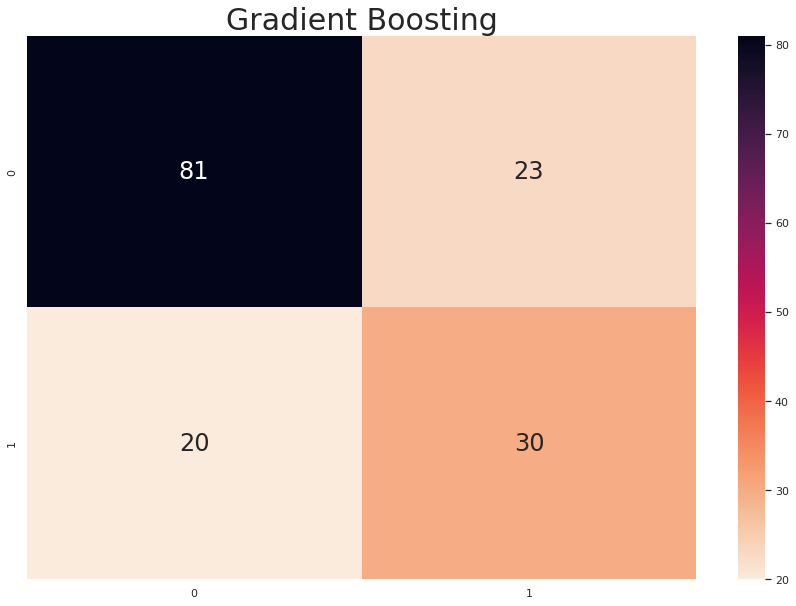

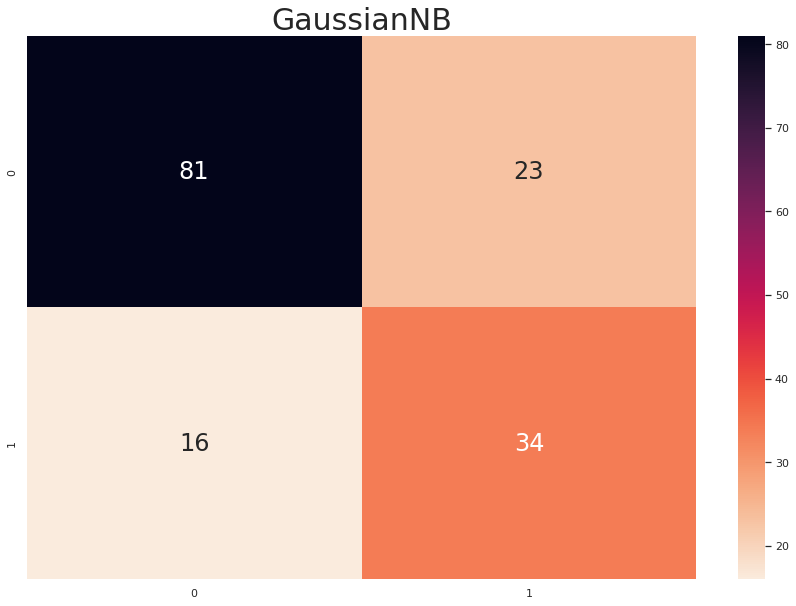

In [44]:
for x in range(8):
    cmap = sns.cm.rocket_r
    sns.set(rc={"figure.figsize":(15, 10)})
    fig, axes = plt.subplots(1,1)
    sns.heatmap(cmatrix['Cmx'][x], cmap=cmap, annot=True,annot_kws={"size":24}).set_title(cmatrix['Classifier'][x], fontdict = { 'fontsize': 30})
    

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>F ) </b> Thoughts </p></div>
> Logistic Regression, Gradient Boosting, Support Vector and Random Forest are the models we will explore more.

---

# <div style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:120%;letter-spacing:0.5px;margin:0"><b>Part V: </b> Hyper Tuning </p></div>

> During the Hyertuning section we will run a GridSearchCV to see which paramater combination leads to the highest mean accuracy and proceed with that. Also I will run the default model parameters and a random selection of parameters to judge the efficacy of the GridSearchCV

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>A ) </b> Logisitic Regression </p></div>

### HyperTuning *Logistic Regression* with GridSearchCV

In [45]:
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = False, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train, y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Mean Accuracy: 0.769
Config: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


#### GridSearch Winner

In [63]:
LR = LogisticRegression(random_state=45, C= 100, max_iter= 100, penalty='l2', solver= 'liblinear')
LR_FIT = LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
print("Accuracy on training set: {:.3f}".format(LR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR.score(X_test, y_test)))

Accuracy on training set: 0.780
Accuracy on test set: 0.753


#### Default Parameters

In [76]:
LR2 = LogisticRegression(random_state=45)
LR2_FIT = LR2.fit(X_train, y_train)
LR2_pred = LR2.predict(X_test)
print("Accuracy on training set: {:.3f}".format(LR2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR2.score(X_test, y_test)))

Accuracy on training set: 0.783
Accuracy on test set: 0.760


#### Random Parameters

In [65]:
LR3 = LogisticRegression(random_state=45, C= 1000, max_iter= 700, penalty='l2', solver= 'lbfgs')
LR3_FIT = LR3.fit(X_train, y_train)
lr_pred = LR.predict(X_test)
print("Accuracy on training set: {:.3f}".format(LR3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR3.score(X_test, y_test)))

Accuracy on training set: 0.780
Accuracy on test set: 0.753


# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>B ) </b> Support Vector </p></div>

### HyperTuning *Support Vector Classifer* with GridSearchCV

In [49]:
from sklearn.svm import SVC
svm = SVC()
svmparam_grid = {
    'C':[0.1,1,100,1000],
    'kernel':['rbf','poly','sigmoid','linear'],
    'degree':[1,3,5],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svm_search = GridSearchCV(svm, param_grid=svmparam_grid, refit = True, verbose = False, cv=5)
svm_search.fit(X_train,y_train)
svm_search.best_params_

print('Mean Accuracy: %.3f' % svm_search.best_score_)
print('Config: %s' % svm_search.best_params_)
svm_search.best_params_

Mean Accuracy: 0.772
Config: {'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}


{'C': 100, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}

#### GridSearch Winner

In [66]:
svm = SVC(random_state=45, C=1000, degree=1, gamma=0.0001, kernel='rbf')
svm_FIT = svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Accuracy on training set={:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set={:.3f}".format(svm.score(X_test, y_test)))

Accuracy on training set=0.787
Accuracy on test set=0.773


#### Default Parameters

In [67]:
svm2 = SVC(random_state=45)
svm2_FIT = svm2.fit(X_train, y_train)
svm2_pred = svm2.predict(X_test)
print("Accuracy on training set: {:.3f}".format(svm2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm2.score(X_test, y_test)))

Accuracy on training set: 0.826
Accuracy on test set: 0.740


#### Random Parameters

In [68]:
svm3 = SVC(random_state=45, C=1000, degree=3, gamma=0.01, kernel='linear')
svm3_FIT = svm3.fit(X_train, y_train)
svm3_pred = svm3.predict(X_test)
print("Accuracy on training set: {:.3f}".format(svm3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm3.score(X_test, y_test)))

Accuracy on training set: 0.787
Accuracy on test set: 0.740


# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>C ) </b> Gradient Boost </p></div>

### HyperTuning *Gradient Boosting* with GridSearchCV

In [53]:
GBC = GradientBoostingClassifier(random_state = 45)
GBCparam_grid = {
    "n_estimators":[5,50,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,1,100],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "subsample":[0.5, 0.9, 1.0]

}
GBC_search = GridSearchCV(GBC, param_grid=GBCparam_grid, refit = True, n_jobs=-1, verbose = False, cv=5)
GBC_search.fit(X_train, y_train)
GBC_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % GBC_search.best_score_)
print('Config: %s' % GBC_search.best_params_)
GBC_search.best_params_

Mean Accuracy: 0.780
Config: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_split': 0.2, 'n_estimators': 500, 'subsample': 1.0}


{'learning_rate': 0.01,
 'max_depth': 7,
 'min_samples_split': 0.2,
 'n_estimators': 500,
 'subsample': 1.0}

Fitting the model for grid search 

#### GridSearch Winner

In [69]:
GBC = GradientBoostingClassifier(random_state=45, learning_rate= 0.1, max_depth= 5, min_samples_split= 0.23333333333333334, n_estimators= 50, subsample= 1.0)
GBC_FIT = GBC.fit(X_train, y_train)
GBC_pred = GBC.predict(X_test)
print("Accuracy on training set: {:.3f}".format(GBC.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBC.score(X_test, y_test)))

Accuracy on training set: 0.889
Accuracy on test set: 0.727


#### Default Parameters

In [70]:
GBC2 = GradientBoostingClassifier(random_state=45, learning_rate=0.01, max_depth= 9, n_estimators=500, subsample=1.0)
GBC2_FIT = GBC2.fit(X_train, y_train)
GBC2_pred = GBC2.predict(X_test)
print("Accuracy on training set: {:.3f}".format(GBC2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBC2.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.701


#### Random Parameters

In [71]:
GBC3 = GradientBoostingClassifier(random_state=45,learning_rate= 0.1, max_depth= 7, min_samples_split= 0.18888888888888888, n_estimators= 50, subsample= 1.0)
GBC3_FIT = GBC3.fit(X_train, y_train)
GBC3_pred = GBC3.predict(X_test)
print("Accuracy on training set: {:.3f}".format(GBC3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GBC3.score(X_test, y_test)))

Accuracy on training set: 0.935
Accuracy on test set: 0.708


# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>D ) </b> Random Forest </p></div>

### HyperTuning *Random Forest* with GridSearchCV

In [57]:
RFR = RandomForestClassifier()
RFRparam_grid= {"n_estimators" :[100,200,500,1000], 
        "max_features": [3,5,7], 
        "min_samples_split": [2,5,10,30],
        "max_depth": [3,5,8,None]
        }

RFR_search = GridSearchCV(RFR, param_grid=RFRparam_grid, refit = True, verbose = False, cv=5)

# fitting the model for grid search 
RFR_search.fit(X_train, y_train)
RFR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % RFR_search.best_score_)
print('Config: %s' % RFR_search.best_params_)

Mean Accuracy: 0.780
Config: {'max_depth': None, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}


#### GridSearch Winner

In [72]:
RFC = RandomForestClassifier(random_state = 45,max_depth= 8, max_features= 3, min_samples_split= 5, n_estimators= 100)
RFC_FIT = RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)
print("Accuracy on training set: {:.3f}".format(RFC.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RFC.score(X_test, y_test)))

Accuracy on training set: 0.932
Accuracy on test set: 0.760


#### Default Parameters

In [73]:
RFC2 = RandomForestClassifier(random_state = 45)
RFC2_FIT = RFC2.fit(X_train, y_train)
RFC2_pred = RFC2.predict(X_test)
print("Accuracy on training set: {:.3f}".format(RFC2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RFC2.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.753


#### Random Parameters

In [74]:
RFC3 = RandomForestClassifier(random_state = 45, max_depth= 8, max_features= 5, min_samples_split= 30, n_estimators= 1000)
RFC3_FIT = RFC3.fit(X_train, y_train)
RFC3_pred = RFC3.predict(X_test)
print("Accuracy on training set: {:.3f}".format(RFC3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RFC3.score(X_test, y_test)))

Accuracy on training set: 0.852
Accuracy on test set: 0.747


# <div style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:120%;letter-spacing:0.5px;margin:0"><b>Part VI: </b> Cross Validate Again  </p></div>

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>A ) </b> CV Scores (Post HyperTuning) </p></div>

In [75]:
print("The Cross Validation Scores for Logistic Regression is:", cross_val_score(LR_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Logistic Regression 2 is:", cross_val_score(LR2_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Logistic Regression 3 is:", cross_val_score(LR3_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Support Vector is:", cross_val_score(svm_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Support Vector 2 is:", cross_val_score(svm2_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Support Vector 3 is:", cross_val_score(svm3_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Gradient Boosting Classifier is:", cross_val_score(GBC_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Gradient Boosting Classifier 2 is:", cross_val_score(GBC2_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Gradient Boosting Classifier 3 is:", cross_val_score(GBC3_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Random Forest Classifer is:", cross_val_score(RFC_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Random Forest Classifer 2 is:", cross_val_score(RFC2_FIT, X, y, cv =5).mean())
print("The Cross Validation Scores for Random Forest Classifer 3 is :", cross_val_score(RFC3_FIT, X, y, cv =5).mean())

The Cross Validation Scores for Logistic Regression is: 0.760427807486631
The Cross Validation Scores for Logistic Regression 2 is: 0.7630336983278159
The Cross Validation Scores for Logistic Regression 3 is: 0.7617349970291146
The Cross Validation Scores for Support Vector is: 0.7656395891690009
The Cross Validation Scores for Support Vector 2 is: 0.7669382904677022
The Cross Validation Scores for Support Vector 3 is: 0.7630252100840337
The Cross Validation Scores for Gradient Boosting Classifier is: 0.7669552669552671
The Cross Validation Scores for Gradient Boosting Classifier 2 is: 0.7266700619641796
The Cross Validation Scores for Gradient Boosting Classifier 3 is: 0.7565486800780918
The Cross Validation Scores for Random Forest Classifer is: 0.7630846277905101
The Cross Validation Scores for Random Forest Classifer 2 is: 0.7695951107715814
The Cross Validation Scores for Random Forest Classifer 3 is : 0.7591885238944063



# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>B ) </b> Logisitic Regression </p></div>

Best Logistic Regression Model
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       104
           1       0.64      0.58      0.61        50

    accuracy                           0.76       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.76      0.76       154

[[88 16]
 [21 29]]


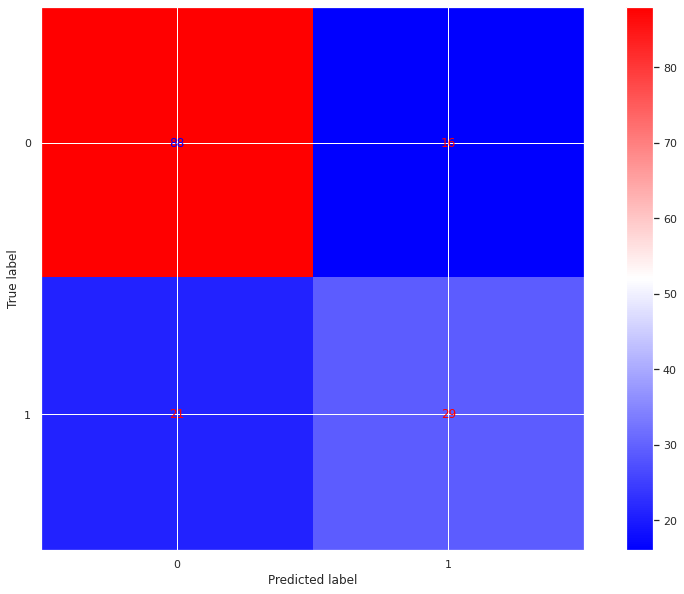

In [86]:
print('Best Logistic Regression Model')
print(classification_report(y_test, LR2_pred))
print(cfmx(y_test, LR2_pred))
plot_confusion_matrix(LR2_FIT, X_test, y_test, cmap='bwr')

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>C ) </b> SVC </p></div>

Best Support Vector Model
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       104
           1       0.62      0.50      0.56        50

    accuracy                           0.74       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154

[[89 15]
 [25 25]]


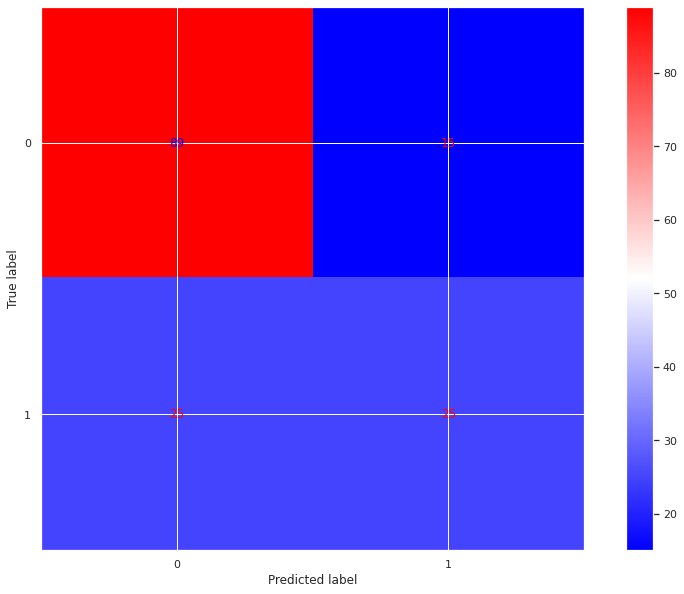

In [88]:
print('Best Support Vector Model')
print(classification_report(y_test, svm2_pred))
print(cfmx(y_test, svm2_pred))
plot_confusion_matrix(svm2_FIT, X_test, y_test, cmap='bwr')

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>D ) </b> Gradient Boost </p></div>

Best GradientBoostingClassifier Model
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       104
           1       0.58      0.60      0.59        50

    accuracy                           0.73       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

[[82 22]
 [20 30]]


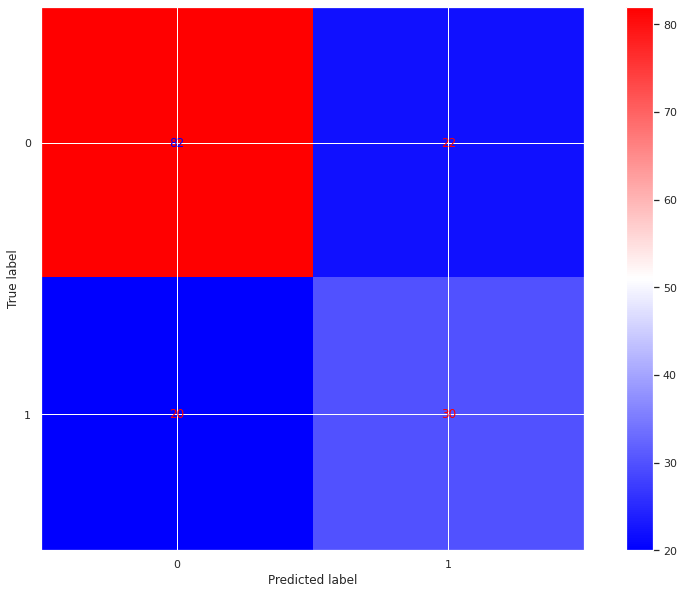

In [90]:
print('Best GradientBoostingClassifier Model')
print(classification_report(y_test, GBC_pred))
print(cfmx(y_test, GBC_pred))
plot_confusion_matrix(GBC_FIT, X_test, y_test, cmap='bwr')

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>E ) </b> Random Forest </p></div>

Best RandomForestClassifier Model
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       104
           1       0.62      0.60      0.61        50

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

[[86 18]
 [20 30]]


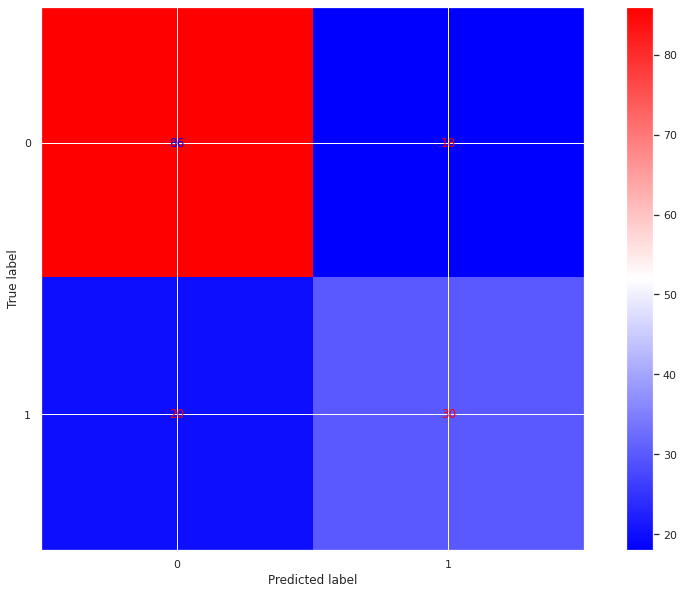

In [91]:
print('Best RandomForestClassifier Model')
print(classification_report(y_test, RFC2_pred))
print(cfmx(y_test, RFC2_pred))
plot_confusion_matrix(RFC2_FIT, X_test, y_test, cmap='bwr')

---

# <div style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:120%;letter-spacing:0.5px;margin:0"><b>Part VII: </b> Feature Importance </p></div>


By determining the value of each feature we can than decide which feautres to focus on when running our final models

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>A ) </b> Each Model's Feature Importance </p></div>

In [97]:
importance = LR.coef_[0]
feature_importances = [(Features, importance) for Features, importance in zip(X, importance)]
featsLR = pd.DataFrame(feature_importances, columns =['Features', 'Importance']).sort_values(by='Importance', ascending = False).head(7)

fig = px.bar(x = featsLR.Features, y= featsLR.Importance, title = "Features Importance of Logisitic Regression", 
      color = featsLR.Importance, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(xaxis=dict(title='Features'), yaxis=dict(title='Importance'), font=fontdict, title_font=titledict, height=500)

In [98]:
importance = svm3.coef_[0]
feature_importances = [(Features, importance) for Features, importance in zip(X, importance)]
featsLR = pd.DataFrame(feature_importances, columns =['Features', 'Importance']).sort_values(by='Importance', ascending = False).head(7)

fig = px.bar(x = featsLR.Features, y= featsLR.Importance, title = "Features Importance of Logisitic Regression", 
      color = featsLR.Importance, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(xaxis=dict(title='Features'), yaxis=dict(title='Importance'), font=fontdict, title_font=titledict, height=500)

In [99]:
GBC.feature_importances_
importances=list(GBC.feature_importances_)
feature_importances = [(Features, round(importance, 2)) for Features, importance in zip(X, importances)]
featsGB = pd.DataFrame(feature_importances, columns =['Features', 'Importance']).sort_values(by='Importance', ascending = False).head(7)

fig = px.bar(x = featsGB.Features, y= featsGB.Importance, title = "Features Importance of Gradient Boost", 
      color = featsGB.Importance, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(xaxis=dict(title='Features'), yaxis=dict(title='Importance'), font=fontdict, title_font=titledict, height=500)

In [100]:
GBC2.feature_importances_
importances=list(GBC2.feature_importances_)
feature_importances = [(Features, round(importance, 2)) for Features, importance in zip(X, importances)]
featsGB = pd.DataFrame(feature_importances, columns =['Features', 'Importance']).sort_values(by='Importance', ascending = False).head(7)

fig = px.bar(x = featsGB.Features, y= featsGB.Importance, title = "Features Importance of Gradient Boost Model II", 
      color = featsGB.Importance, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(xaxis=dict(title='Features'), yaxis=dict(title='Importance'),
                  font=fontdict, title_font= titledict, height=500)
fig.show()

In [102]:
RFC2.feature_importances_
importances=list(RFC2.feature_importances_)
feature_importances = [(Features, round(importance, 2)) for Features, importance in zip(X, importances)]
featsRF = pd.DataFrame(feature_importances, columns =['Features', 'Importance']).sort_values(by='Importance', ascending = False).head(10)

fig = px.bar(x = featsRF.Features, y= featsRF.Importance, title = "Features Importance of Random Forest", 
      color = featsRF.Importance, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(xaxis=dict(title='Features'), yaxis=dict(title='Importance'), 
                  font=fontdict, title_font= titledict, height=500)

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>B ) </b>Modeling with the Features of Importance</p></div>

In [103]:
X2 = data.drop(['dpf','pregnancies','bp','st','insulin','outcome'],axis=1)
y2 = data['outcome']

df2 =data.drop(['dpf','pregnancies','bp','st','insulin'],axis=1)
df2.head()

,glucose,bmi,age,outcome
0,148.0,33.6,50,1
1,85.0,26.6,31,0
2,183.0,23.3,32,1
3,89.0,28.1,21,0
4,137.0,43.1,33,1


In [104]:
print(df2.shape)
print(X2.shape)
print(y2.shape)

(768, 4)
(768, 3)
(768,)


In [105]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,stratify = df2.outcome, test_size=0.2, random_state=45)

In [106]:
GB_final = 'outcome ~ glucose'
x = sm.add_constant(X2)
model = smf.ols(formula=GB_final, data=df2).fit()

resi = model.resid
abs_residuals = np.abs(resi)

standard_residuals = model.get_influence().resid_studentized_internal
sqrt_abs_residuals = np.sqrt(np.abs(standard_residuals))

leverage = model.get_influence().hat_matrix_diag
cooks_distance = model.get_influence().cooks_distance

Text(0.5, 1.0, 'Residuals Probability of Gradient Booster')

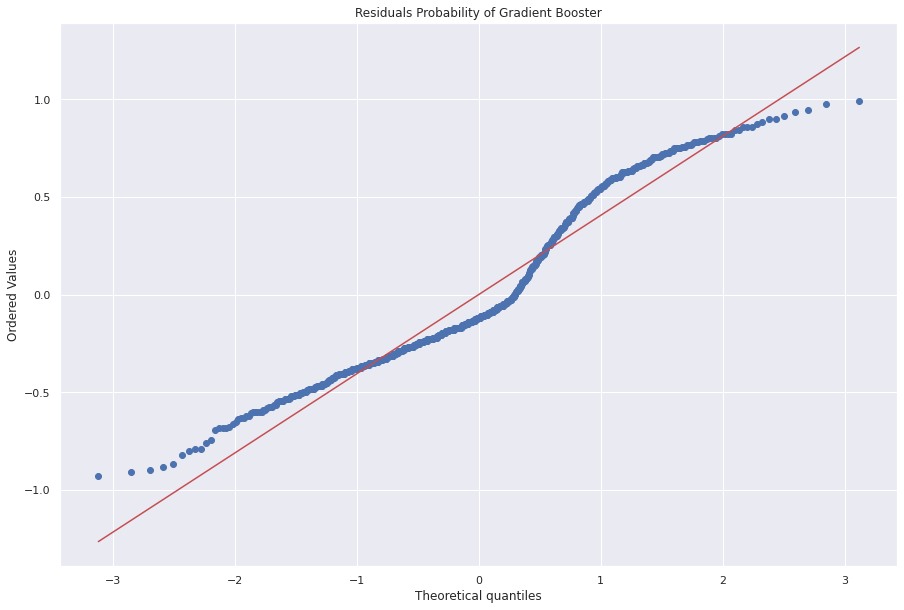

In [108]:
st.probplot(model.resid, plot=plt)
plt.title('Residuals Probability of Gradient Booster')

In [110]:
X_train2.to_csv('data/xtrain.csv', sep=',')
X_test2.to_csv('data/xtest.csv', sep=',')
y_train2.to_csv('data/ytrain.csv', sep=',')
y_test2.to_csv('data/ytest.csv', sep=',')

In [115]:
def roc_curve(title):
    fig = px.area(
        x=fpr, y=tpr,
        labels=dict(x='False Positive Rate', y='True Positive Rate')
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.update_layout(height=500, width=500,font=fontdict, 
                      title={'text':f'ROC Curve (AUC={auc(fpr, tpr):.4f}):'+title, 
                             'font':titledict, 'x':0.5})
    fig.show()


In [116]:
probs = GBC3.predict_proba(X_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test2, preds)
roc_auc = metrics.auc(fpr, tpr)

roc_curve(title=' Gradient Boost III')

In [117]:
probs = RFC3.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

roc_curve(title=' Random Forest Classifier')

# <div style="color:white;display:fill;border-radius:5px;background-color:#4a708b;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b>C ) </b>Evaluate each model with feature imporantance instituted </p></div>

In [119]:
models = []


models.append(('RFC', RandomForestClassifier(random_state = 42, max_depth=None, max_features=7, min_samples_split=10,
                         n_estimators=100)))
models.append(('GBC2', GradientBoostingClassifier(random_state=45, learning_rate=0.01, max_depth= 9, n_estimators=500, subsample=1.0)))
models.append(('SVC', SVC(random_state=45, C=1000, degree=1, gamma=0.0001, kernel='rbf')))
models.append(("LR", LogisticRegression(random_state = 45, C=100, solver='liblinear')))

results = []
names = []
               
for name, model in models:
    
        kfold = KFold(n_splits = 10, shuffle=True, random_state = 45)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

result = pd.DataFrame(results).T
result.columns = names

fig = go.Figure()
fig.add_trace(go.Violin(y=result.RFC, name='Random Forest', box_visible=True, line_color='black', fillcolor='blue', points='all', opacity=0.6, meanline_visible=True))
fig.add_trace(go.Violin(y=result.GBC2, name='Gradient Boost', box_visible=True, line_color='black', fillcolor='purple', points='all', opacity=0.6, meanline_visible=True))
fig.add_trace(go.Violin(y=result.SVC, name='SVC', box_visible=True, line_color='black', fillcolor='red', points='all', opacity=0.6, meanline_visible=True))
fig.add_trace(go.Violin(y=result.LR, name='Logisitic Regression', box_visible=True, line_color='black', fillcolor='green', points='all', opacity=0.6, meanline_visible=True))
fig.update_yaxes(title='Accuracy')
fig.update_layout(title='Perfomance of Top 4 Models', title_font=titledict, font=fontdict, height=500)
fig.show()

RFC: 0.765584 (0.058515)
GBC2: 0.735714 (0.052231)
SVC: 0.768199 (0.037516)
LR: 0.759074 (0.038587)



# <div style="color:white;display:fill;border-radius:5px;background-color:#98f5ff;font-family:DM Serif Display;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:120%;letter-spacing:0.5px;margin:0">Conclusion</p></div>

After filtering and testing various models it seem that either thta the Support Vector Classifier would be the best for the situtation. The  Random Forest is right behind it with higher scores on occasion but not as consistent. Either way they would both be adequate with around 80% success. I am definitley planning on revisiting this though so I can do a little more tuning a find a model that consistently gets over a 90% success rate.

As for predictor variables, it definitely seems like Glucose leves are maginitudes more influential than the rest of the variables. While BMI and Age did play a role, Glucose was essentailly unmatched. Even though its going to make me sound like a square, stop eating sugar. Fats all day before you think of having sugar in terms of indulging. Healthy fats though too. 

### - Taylor Segell